<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/Tema3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
pd = pd.read_csv('sample_data/banco.csv')
pd

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,balance
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,0,2324
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,0,1245
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,1,1290
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,0,1626
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,1,1344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40756,59.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,0,3328
40757,31.0,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,0,1072
40758,42.0,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,0,2240
40759,48.0,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,0,1375


In [62]:
# mostrar informacion de los datos numericos y categoricos
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40761 entries, 0 to 40760
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          40760 non-null  float64
 1   job          40761 non-null  object 
 2   marital      40761 non-null  object 
 3   education    39555 non-null  object 
 4   default      40761 non-null  object 
 5   housing      40761 non-null  object 
 6   loan         40761 non-null  object 
 7   contact      40761 non-null  object 
 8   month        40761 non-null  object 
 9   day_of_week  40761 non-null  object 
 10  duration     40761 non-null  int64  
 11  campaign     40761 non-null  int64  
 12  pdays        40761 non-null  int64  
 13  previous     40761 non-null  int64  
 14  poutcome     40761 non-null  object 
 15  y            40761 non-null  int64  
 16  balance      40761 non-null  int64  
dtypes: float64(1), int64(6), object(10)
memory usage: 5.3+ MB


In [63]:
pd.shape

(40761, 17)

In [64]:
pd.describe()

,age,duration,campaign,pdays,previous,y,balance
count,40760.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000
mean,40.051178,258.243910,2.568092,962.604794,0.172690,0.112436,1923.069944
std,10.874653,259.259809,2.772611,186.591317,0.494212,0.315906,2254.201992
min,17.000000,-5.000000,1.000000,0.000000,0.000000,0.000000,-200.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,0.000000,851.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1903.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,0.000000,2958.000000
max,600.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,250000.000000


In [65]:
# Mostrar información de los datos categóricos
print(" Datos numericos")
display(pd.select_dtypes(include=["int64", "float"]).describe())
print(" Datos categoricos")
display(pd.select_dtypes(include=['object']).describe())

 Datos numericos


,age,duration,campaign,pdays,previous,y,balance
count,40760.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000
mean,40.051178,258.243910,2.568092,962.604794,0.172690,0.112436,1923.069944
std,10.874653,259.259809,2.772611,186.591317,0.494212,0.315906,2254.201992
min,17.000000,-5.000000,1.000000,0.000000,0.000000,0.000000,-200.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,0.000000,851.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1903.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,0.000000,2958.000000
max,600.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,250000.000000


 Datos categoricos


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,40761,40761,39555,40761,40761,40761,40761,40761,40761,40761
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10312,24661,11670,32245,21375,33600,25876,13623,8513,35201


In [66]:
# limpieza de datos faltantes
pd.isnull().sum()


,0
age,1
job,0
marital,0
education,1206
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [67]:
# fila con edad a nulo
pd[pd['age'].isna()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,balance
224,NaN,blue-collar,single,basic.4y,unknown,yes,no,cellular,may,fri,73,1,999,0,nonexistent,0,3385


In [68]:
from sklearn.impute import SimpleImputer
#creamos un imputador para reemplazar los valores faltantes rellenando con la media
imputer = SimpleImputer(strategy='mean')
pd['age'] = (imputer.fit_transform(pd[['age']])).astype(int)

In [69]:
pd.iloc[224,:] # buscamos la fila 224

,224
age,40
job,blue-collar
marital,single
education,basic.4y
default,unknown
housing,yes
loan,no
contact,cellular
month,may
day_of_week,fri


In [70]:
# valores que no se saben de la columna de education
pd['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', nan, 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [71]:
#rellenar con desconocidos los nan de educacition
pd['education'] = pd['education'].fillna('unknown')

In [72]:
pd['education'].isnull().sum()

np.int64(0)

#Columnas irrelevantes


In [73]:
# columnas que tengan un unico valor categorico
cols_cat= pd.select_dtypes(include=['object']).columns
for col in cols_cat:
  print(f'Columna{col}:{pd[col].unique()}')

Columnajob:['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'unemployed' 'entrepreneur' 'housemaid' 'self-employed' 'Management'
 'student']
Columnamarital:['married' 'single' 'divorced' 'Divorced']
Columnaeducation:['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
Columnadefault:['unknown' 'no' 'yes']
Columnahousing:['yes' 'no' 'unknown']
Columnaloan:['no' 'yes' 'YES']
Columnacontact:['cellular' 'telephone']
Columnamonth:['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
Columnaday_of_week:['thu' 'fri' 'tue' 'mon' 'wed']
Columnapoutcome:['nonexistent' 'success' 'failure']


# Filas repetidas

In [74]:
print(f'Tamaño antes de qyutar las filas repetidas': {data.shape[0]})
pd.drop_duplicates(inplace=True)


SyntaxError: invalid syntax (ipython-input-4187990804.py, line 1)

In [75]:
# comprobar si hay datos duplicados
pd.duplicated().sum()

np.int64(0)

#Outliers


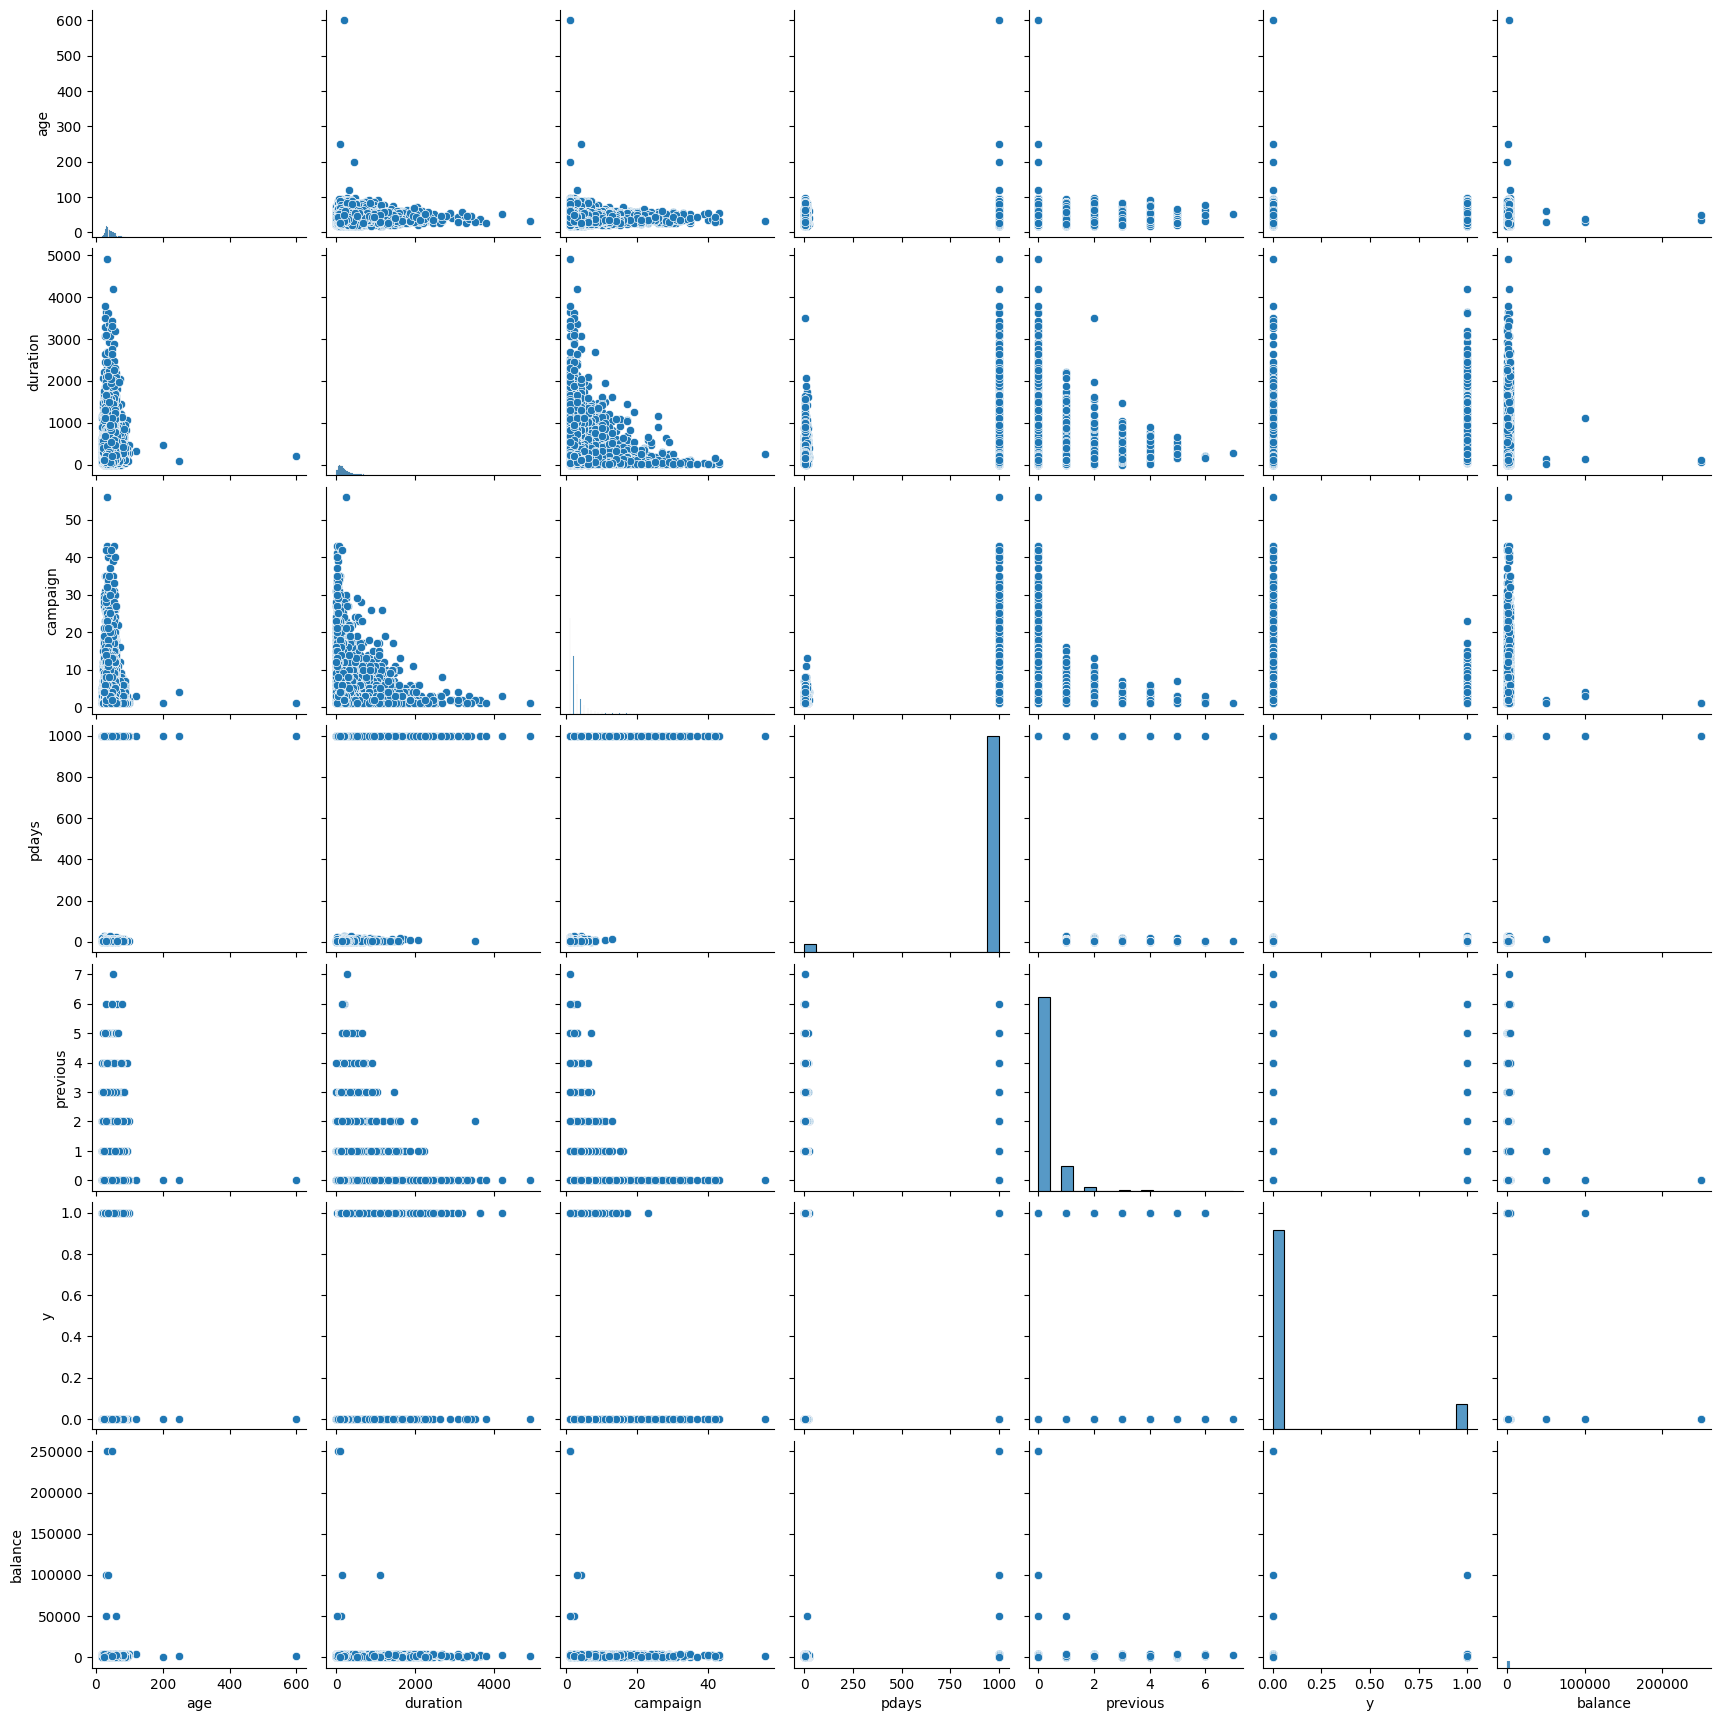

In [76]:
# realizar grafic del data set
sns.pairplot(pd)


<Axes: xlabel='age'>

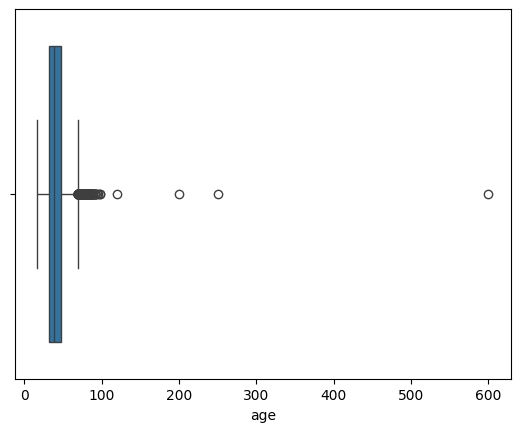

In [41]:

# representacion de los outliers del data set con boxplot de edad
sns.boxplot(x=pd['age'])


<Axes: xlabel='balance'>

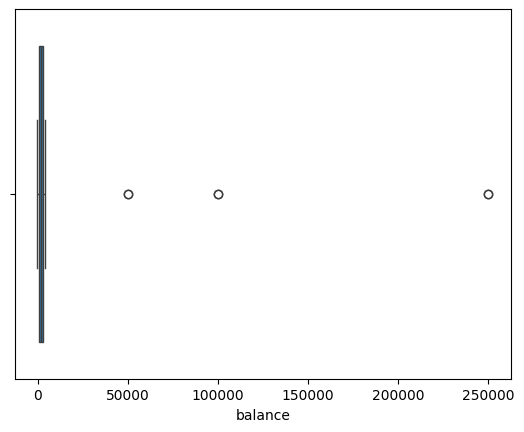

In [43]:
sns.boxplot(x=pd['balance'])

In [44]:
# borramos edades mayores de 100, nos quedamos con un dataset que tenga solo edades menores que 100
pd = pd[pd['age'] <= 100]

In [77]:
# mostrar la duration menor que 0
pd[pd['duration']>0]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,balance
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,0,2324
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,0,1245
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,1,1290
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,0,1626
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,1,1344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40756,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,0,3328
40757,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,0,1072
40758,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,0,2240
40759,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,0,1375


In [79]:
# Corregir errores de los valores categoricos, todo a minuscula como divorce , managment, yes
cols_cat= pd.select_dtypes(include=['object']).columns
for col in cols_cat:
  pd[col] = pd[col].str.lower()
  pd[col] = pd[col].str.strip()
  pd[col] = pd[col].str.replace(' ', '_')
  print(f'Columna{col}:{pd[col].unique()} valores')
  pd[col].unique()

Columnajob:['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'unemployed' 'entrepreneur' 'housemaid' 'self-employed' 'student'] valores
Columnamarital:['married' 'single' 'divorced'] valores
Columnaeducation:['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate'] valores
Columnadefault:['unknown' 'no' 'yes'] valores
Columnahousing:['yes' 'no' 'unknown'] valores
Columnaloan:['no' 'yes'] valores
Columnacontact:['cellular' 'telephone'] valores
Columnamonth:['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec'] valores
Columnaday_of_week:['thu' 'fri' 'tue' 'mon' 'wed'] valores
Columnapoutcome:['nonexistent' 'success' 'failure'] valores


In [80]:
# c) Guarda el dataset resultante en banco_limpio.csv
pd.to_csv('banco_limpio.csv', index=False)
